In [1]:
from cluster_analitics import optim as op
from cluster_analitics.analitics import ReductionDim, Analisis
from cluster_analitics import plotter as plt
from sklearn.preprocessing import StandardScaler
from tensorflow import random as rn
import json

In [2]:
import pandas as pd
import numpy as np
import random
random.seed(1)
def balancedCut(df ,n ,frac = [0.5], target = 'Class',classes=[0,1]):
    print(f'{"="*50}\nbalancedCut\n{"="*50}')
    print(f'Realizando seleccion de la muestra la muestra')
    newDfs = []
    if sum(frac) > 1:
        print(f'Valor de la fraccion incorrecto: --> {sum(frac)} > 1')
        
    if len(frac) < len(classes):
        frac.append(1-sum(frac))
    
    for cl,fc in zip(classes, frac):
        ndf = df[df[target]==cl]
        ro = ndf.shape[0]
        print(f'Dataset de clase --> {cl}')
        if int(fc*n) > ro:
            newDfs.append(ndf)
            print(f'\tFilas: {ro}')
        else:
            newDfs.append(ndf.sample(n=int(fc*n)))
            print(f'\tFilas: {int(fc*n)}')
    
    return pd.concat(newDfs), newDfs[1].shape[0]/newDfs[0].shape[0]

In [3]:
random.seed(1)
cards = pd.read_csv("./creditcard.csv")
cards = cards.sample(frac=1)


cards.head()

df, frac = balancedCut(cards, 30000, frac=[0.9])
scaler = StandardScaler()
x = df.iloc[:,0:-1].to_numpy()

y = df.iloc[:,-1].to_numpy() 

x = scaler.fit_transform(x)

balancedCut
Realizando seleccion de la muestra la muestra
Dataset de clase --> 0
	Filas: 27000
Dataset de clase --> 1
	Filas: 492


In [4]:
frac

0.018222222222222223

In [5]:
reduccion={'encoder':{'capas':[[512,128]], 'finalDim':4, 'batch_size':4, 'epochs':50 }}

In [6]:
modelos = {'isoForest':{'contamination':[0.2, frac,0.01,0.015]}}

In [7]:
# seed
#    999
#    888

#rn.set_seed(888)
obj = op.main(x,y,reduccion=reduccion,analisis=modelos)

2022-05-04 11:54:03.095169: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-04 11:54:03.224369: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-04 11:54:03.224523: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-04 11:54:03.225210: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/50
6873/6873 [==============================] - 18s 2ms/step - loss: 0.8962 - val_loss: 0.8790
Epoch 2/50
6873/6873 [==============================] - 16s 2ms/step - loss: 0.8793 - val_loss: 0.8728
Epoch 3/50
6873/6873 [==============================] - 16s 2ms/step - loss: 0.8771 - val_loss: 0.8741
Epoch 4/50
6873/6873 [==============================] - 16s 2ms/step - loss: 0.8757 - val_loss: 0.8695
Epoch 5/50
6873/6873 [==============================] - 16s 2ms/step - loss: 0.8719 - val_loss: 0.8714
Epoch 6/50
6873/6873 [==============================] - 16s 2ms/step - loss: 0.8715 - val_loss: 0.8710
Epoch 7/50
6873/6873 [==============================] - 15s 2ms/step - loss: 0.8710 - val_loss: 0.8727
Epoch 8/50
6873/6873 [==============================] - 16s 2ms/step - loss: 0.8710 - val_loss: 0.8644
Epoch 9/50
6873/6873 [==============================] - 16s 2ms/step - loss: 0.8688 - val_loss: 0.8731
Epoch 10/50
6873/6873 [==============================] - 16s 2ms/step - l

In [8]:
precision = []
recall = []
for o in obj:
    precision.append(o.precision())
    recall.append(o.recall())

plt.precisionRecall(precision,recall, engine = 'plotly')

0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15872     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_2 (Dense)             (None, 128)               640       
                                                                 
 dense_3 (Dense)             (None, 512)               66048     
                                                                 
 dense_4 (Dense)             (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
Non-tr

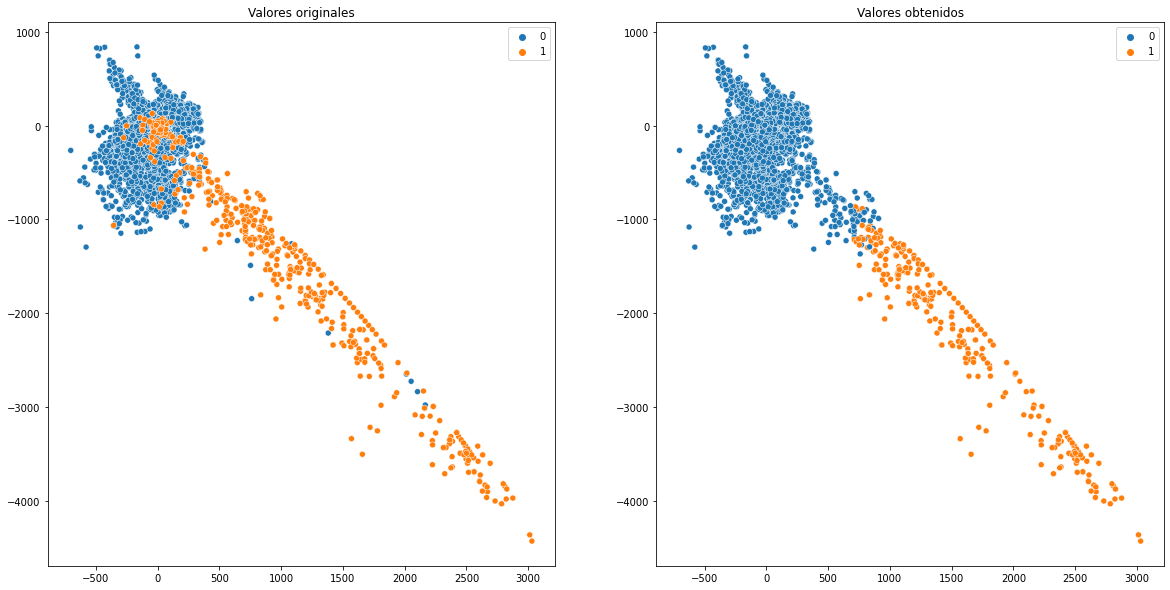

1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15872     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_2 (Dense)             (None, 128)               640       
                                                                 
 dense_3 (Dense)             (None, 512)               66048     
                                                                 
 dense_4 (Dense)             (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
Non-tr

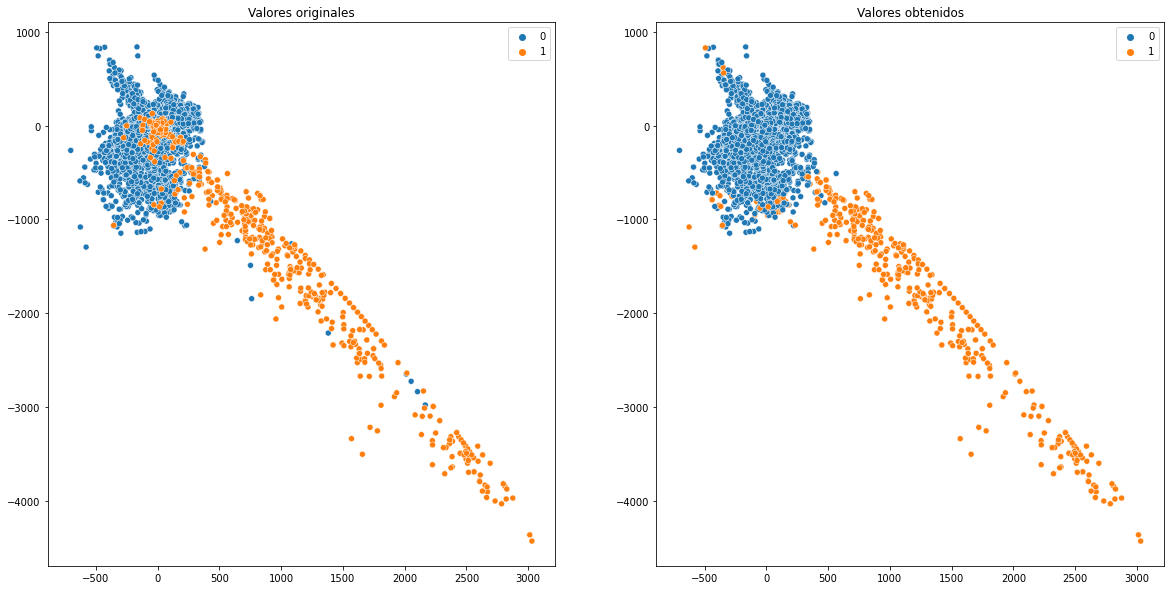

2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15872     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_2 (Dense)             (None, 128)               640       
                                                                 
 dense_3 (Dense)             (None, 512)               66048     
                                                                 
 dense_4 (Dense)             (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
Non-tr

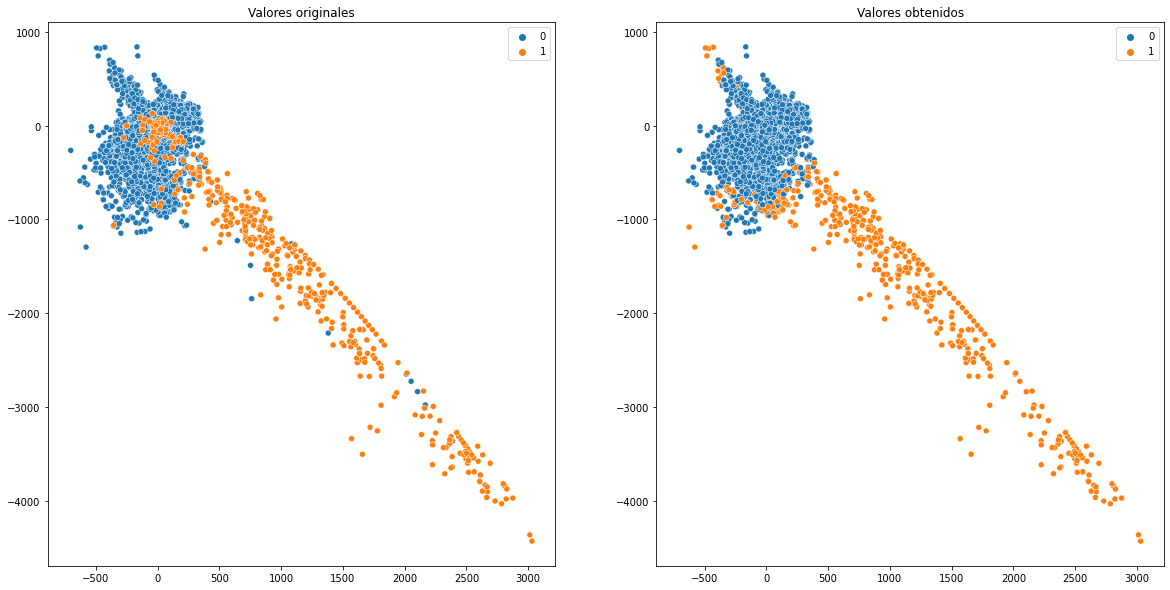

3
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15872     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_2 (Dense)             (None, 128)               640       
                                                                 
 dense_3 (Dense)             (None, 512)               66048     
                                                                 
 dense_4 (Dense)             (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
Non-tr

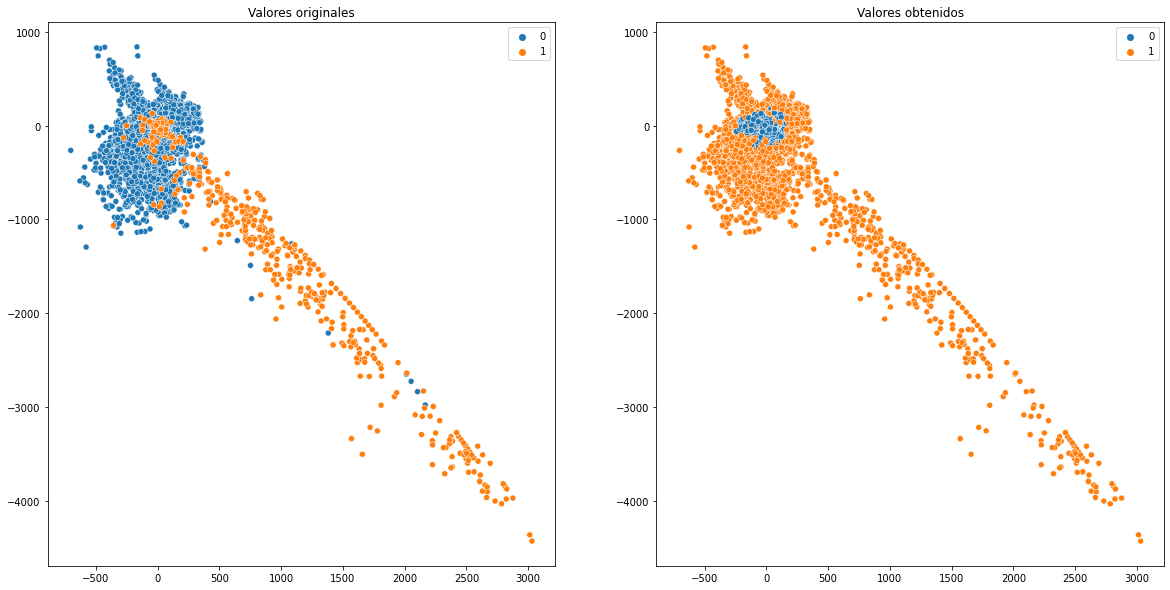

In [9]:
new = []
for n in range(0, len(obj)):
    print(n)
    print(obj[n],'\n',f'Precision: {obj[n].precision()}',f'\n Recall: {obj[n].recall()}\n' )
    
    print('='*75)
    print('|',' '*71,'|')
    print('='*75)
    x_final = obj[n].reduccion.predict()
    obj[n].analisis.setX(x_final)
    y_pred = obj[n].analisis.fit_predict()
    plt.compPlot(x_final,y,y_pred,dim=2, engine='seaborn')

In [10]:
bueno = obj[0]

x_n, y_n = bueno.predictXY()

plt.probPlot(x_n,y_n)

In [11]:
from typing import NoReturn, Union, List
from mlxtend.classifier import EnsembleVoteClassifier
from umap import UMAP

In [12]:
obj[0].analisis

In [13]:
len(x_n)

27492

In [14]:
hard_vot = EnsembleVoteClassifier([obj[0].analisis,obj[1].analisis,obj[2].analisis], fit_base_estimators=False)

hard_vot.fit(x_n,y=np.arange(len(x_n)))

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning:

fit_base_estimators=False enforces use_clones to be `False`



EnsembleVoteClassifier(clfs=[<cluster_analitics.analitics.Analisis object at 0x7f749c152350>,
                       fit_base_estimators=False, use_clones=False)

In [15]:
y_final=hard_vot.predict(X=x_n)

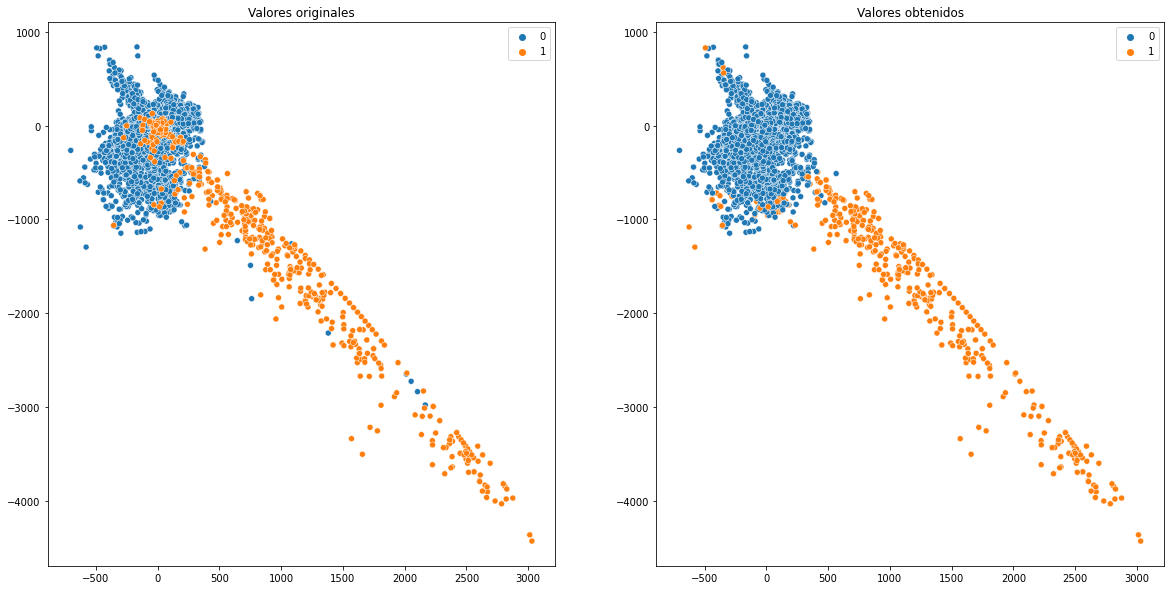

In [16]:
plt.compPlot(x_n,y,hard_vot.predict(x_n),dim=2, engine='seaborn')

In [17]:
wei_hard_vot = EnsembleVoteClassifier([obj[0].analisis,obj[1].analisis,obj[2].analisis], weights=[
        1,
        1,
        0.1
    ], fit_base_estimators=False)
wei_hard_vot.fit(x_n, y)

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning:

fit_base_estimators=False enforces use_clones to be `False`



EnsembleVoteClassifier(clfs=[<cluster_analitics.analitics.Analisis object at 0x7f749c152350>,
                       fit_base_estimators=False, use_clones=False,
                       weights=[1, 1, 0.1])

In [18]:
y_final_wei=wei_hard_vot.predict(X=x_n)

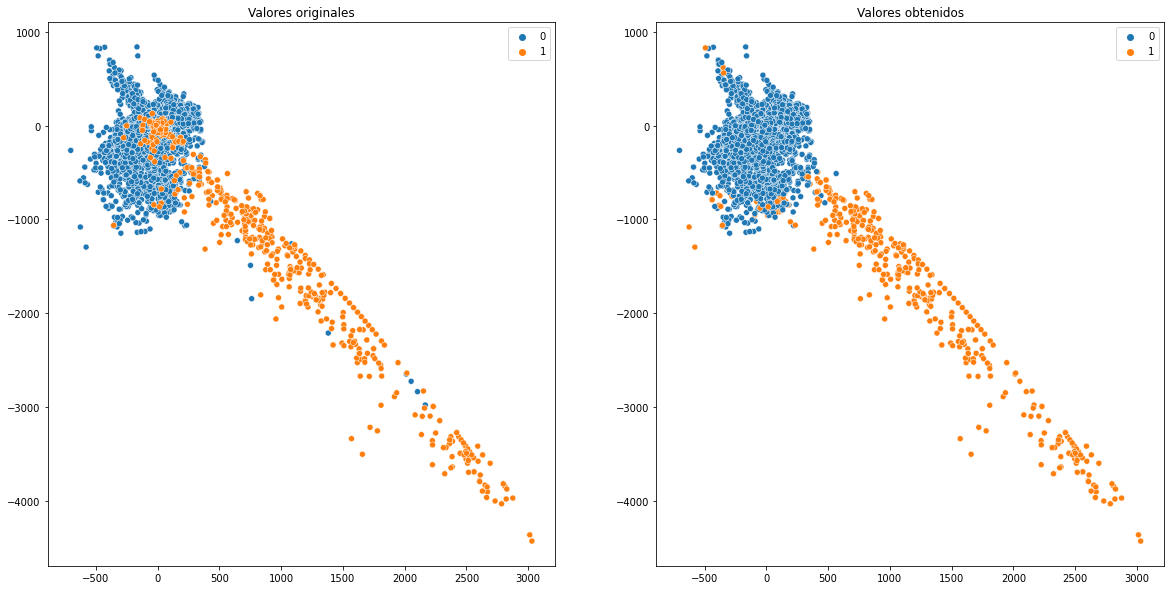

In [19]:
plt.compPlot(x_n,y,y_final_wei,dim=2, engine='seaborn')

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print(classification_report(y,y_final))
print("\n","-"*50,"\n")
print(classification_report(y,y_final_wei))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27000
           1       0.88      0.74      0.80       492

    accuracy                           0.99     27492
   macro avg       0.94      0.87      0.90     27492
weighted avg       0.99      0.99      0.99     27492


 -------------------------------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27000
           1       0.88      0.74      0.80       492

    accuracy                           0.99     27492
   macro avg       0.94      0.87      0.90     27492
weighted avg       0.99      0.99      0.99     27492



In [22]:
plt.prob(x_n,y_final)

array([0.        , 0.        , 0.        , ..., 0.91596076, 0.        ,
       0.        ])

In [37]:
def sumProbs(*args,weights=[], threshold = -1):
    n = len(args)
    args = list(args)
    if not weights:
        weights = np.ones(n)
    for i in range(n):
        args[i] = args[i] * weights[i]
    prob = sum(args)
    prob = prob/np.max(prob)
    if threshold != -1:
        prob[prob < threshold] = 0
    return prob
    

In [38]:
sumProbs(y_final,y_final_wei)

array([0., 0., 0., ..., 2., 0., 0.])